In [5]:
import os
import SimpleITK as sitk
from scipy.interpolate import RegularGridInterpolator 
import numpy as np

In [62]:
file_path = "/Users/amograo/Research_Projects/DL_HIE_2024/data_dir/BONBID2023_Train/1ADC_ss/MGHNICU_010-VISIT_01-ADC_ss.mha"

image = sitk.ReadImage(file_path)
spacing = tuple(image.GetSpacing())[::-1]
image_array = sitk.GetArrayFromImage(image)
print(image_array.shape)
print(spacing)

new_size = 1.375 #0.6875

(23, 128, 128)
(4.0, 1.5625, 1.5625)


In [63]:
x_old = np.linspace(0, (image_array.shape[1]-1)*spacing[1], image_array.shape[1])
y_old = np.linspace(0, (image_array.shape[2]-1)*spacing[2], image_array.shape[2])
z_old = np.arange(0,(image_array.shape[0]))*spacing[0]

In [64]:
print(z_old)

[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40. 44. 48. 52. 56. 60. 64. 68.
 72. 76. 80. 84. 88.]


In [77]:
method = 'linear'
interpolator = RegularGridInterpolator((z_old, x_old, y_old), image_array, method=method, bounds_error=False)


In [78]:
x_new = np.round(image_array.shape[1]).astype(int)
y_new = np.round(image_array.shape[2]).astype(int)
z_new = np.arange(z_old[0], z_old[-1], new_size)

In [79]:
print(z_new)

[ 0.     1.375  2.75   4.125  5.5    6.875  8.25   9.625 11.    12.375
 13.75  15.125 16.5   17.875 19.25  20.625 22.    23.375 24.75  26.125
 27.5   28.875 30.25  31.625 33.    34.375 35.75  37.125 38.5   39.875
 41.25  42.625 44.    45.375 46.75  48.125 49.5   50.875 52.25  53.625
 55.    56.375 57.75  59.125 60.5   61.875 63.25  64.625 66.    67.375
 68.75  70.125 71.5   72.875 74.25  75.625 77.    78.375 79.75  81.125
 82.5   83.875 85.25  86.625]


In [80]:
# pts is the new grid
pts = np.indices((len(z_new), x_new, y_new)).transpose((1, 2, 3, 0))
pts = pts.reshape(1, len(z_new)*x_new*y_new, 1, 3).reshape(len(z_new)*x_new*y_new, 3)
pts = np.array(pts, dtype=float)
pts[:, 1:3] = pts[:, 1:3] * spacing[1]
pts[:, 0] = pts[:, 0] * new_size + z_new[0]


In [81]:
pts.shape[0]/(image_array.shape[1]*image_array.shape[2])

64.0

In [82]:
interpolated_data = interpolator(pts).reshape(len(z_new), x_new, y_new)

In [83]:
interpolated_data.shape

(64, 128, 128)

In [84]:
interpolated_data_float32 = interpolated_data.astype(np.float32)

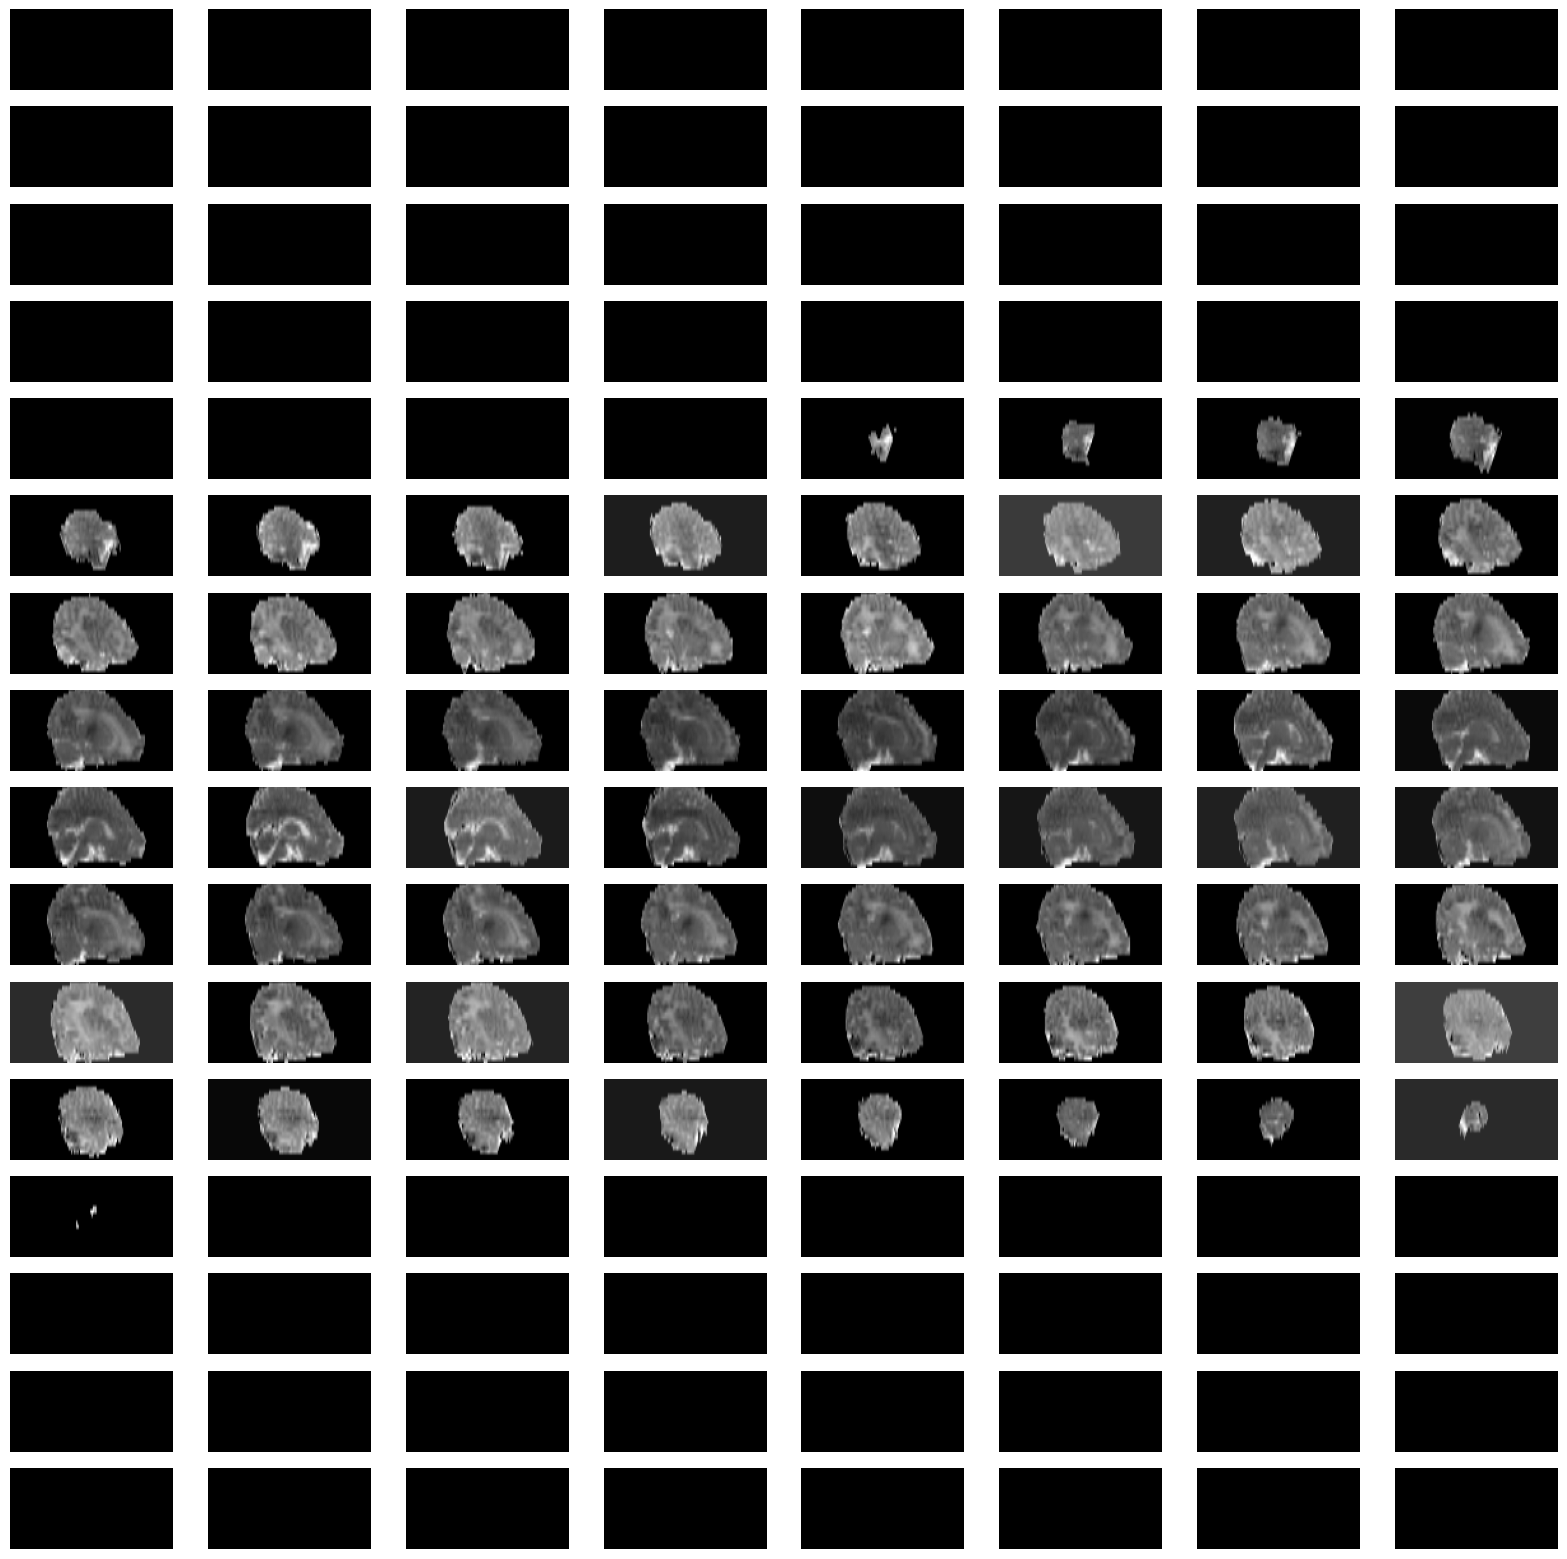

In [94]:
import matplotlib.pyplot as plt
num_slices = interpolated_data_float32.shape[1]

# Define the grid size (adjust based on the number of slices)
cols = 8  # Number of columns in the grid
rows = num_slices // cols + (num_slices % cols > 0)  # Calculate rows required

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(num_slices):
    slicee = np.rot90(np.rot90(interpolated_data_float32[:,:,i]))
    ax = axes[i]
    ax.imshow(slicee, cmap='gray')
    ax.axis('off')

# Hide any empty subplots
for i in range(num_slices, len(axes)):
    axes[i].axis('off')

plt.show()



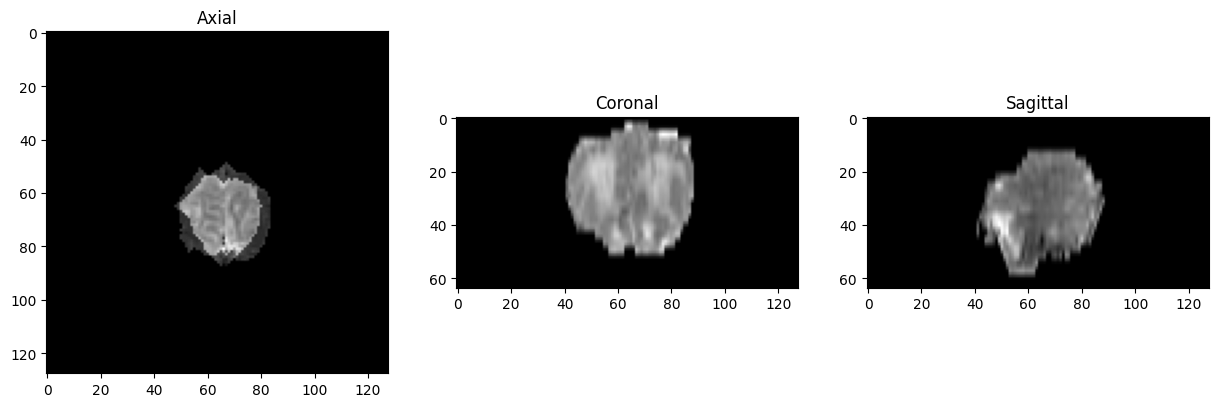

In [99]:
# plot axial, sagittal and coronal slices
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(interpolated_data_float32[63, :, :], cmap='gray')
axs[0].set_title('Axial')
axs[1].imshow(interpolated_data_float32[:, 40, :], cmap='gray')
axs[1].set_title('Coronal')
axs[2].imshow(np.fliplr(np.rot90(np.rot90(interpolated_data_float32[:, :, 40]))), cmap='gray')
axs[2].set_title('Sagittal')
plt.show()


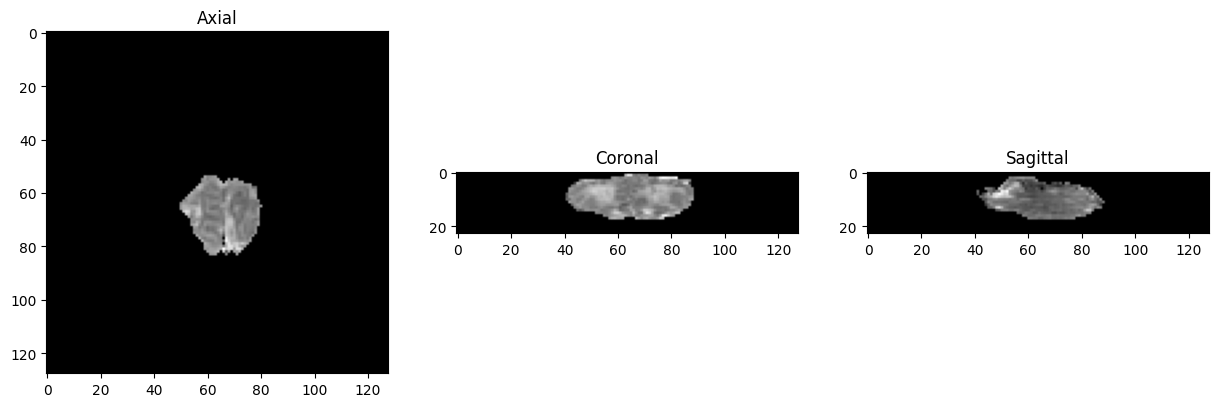

In [61]:
# plot image_array
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image_array[22, :, :], cmap='gray')
axs[0].set_title('Axial')
axs[1].imshow(image_array[:, 40, :], cmap='gray')
axs[1].set_title('Coronal')
axs[2].imshow(image_array[:, :, 40], cmap='gray')
axs[2].set_title('Sagittal')
plt.show()